In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import os

file_name = "ballscrew_s.xlsx"
absolute_path = os.path.abspath(file_name)

print(absolute_path)

C:\Users\Sanam\git\Thesis_ErrorDetection\ballscrew_s.xlsx


In [3]:
# Load your data from the Excel files
data_b = pd.read_excel('ballscrew_s.xlsx')
data_l = pd.read_excel('leadscrew_s.xlsx')

In [4]:
data_b

,commanded position,theoretical position,actual position,error
0,0.09794,0.100,0.10000,0.00206
1,-1.48970,-1.500,-1.45000,-0.03970
2,5.99082,6.000,5.95000,-0.04082
3,-8.50850,-8.500,-8.45001,-0.05849
4,0.48999,0.500,0.45000,-0.03999
...,...,...,...,...
14995,-8.58654,-8.575,-8.52500,-0.06154
14996,-7.59810,-7.600,-7.65000,0.05190
14997,7.49363,7.500,7.50000,0.00637
14998,9.39613,9.400,9.40000,0.00387


In [5]:
# Extract the features (X) and target (Y) for ballscrew
X_b = data_b.iloc[:, :-1].values  # Use all columns except the last one as features
Y_b = data_b.iloc[:, -1].values  # Use the last column as the target

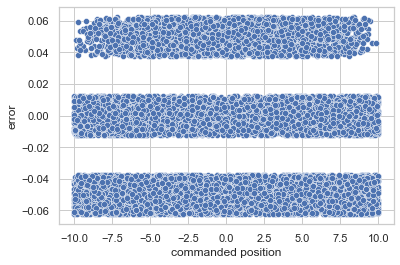

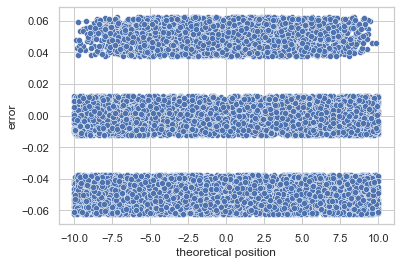

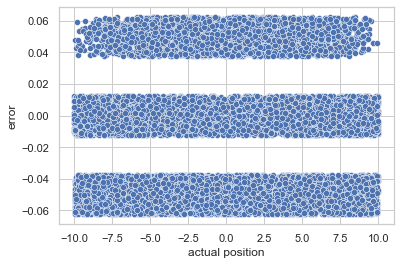

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn styles for the plots
sns.set_theme(style="whitegrid")

# Scatter plot for each feature against the target variable "error"
# Feature: "commanded position" vs "error"
sns.scatterplot(x=data_b['commanded position'], y=data_b['error'])
plt.show()

# Feature: "theoretical position" vs "error"
sns.scatterplot(x=data_b['theoretical position'], y=data_b['error'])
plt.show()

# Feature: "actual position" vs "error"
sns.scatterplot(x=data_b['actual position'], y=data_b['error'])
plt.show()


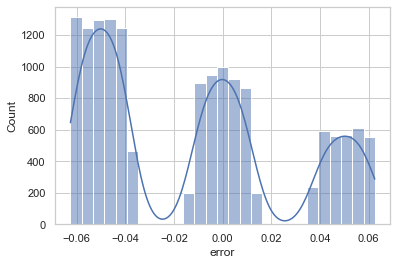

In [7]:
#Histogram
sns.histplot(data_b['error'], kde=True)
plt.show()

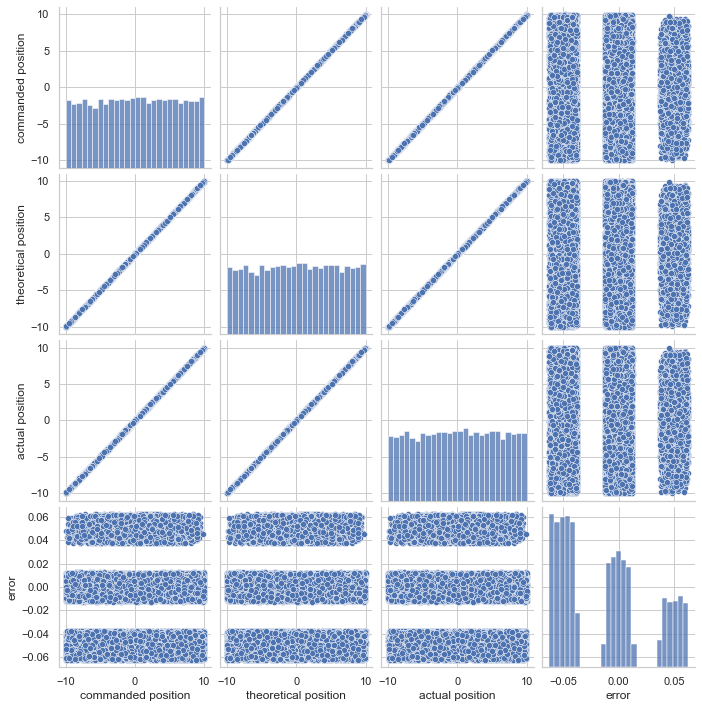

In [8]:
# Seaborn Pair Plot
sns.pairplot(data_b)
plt.show()

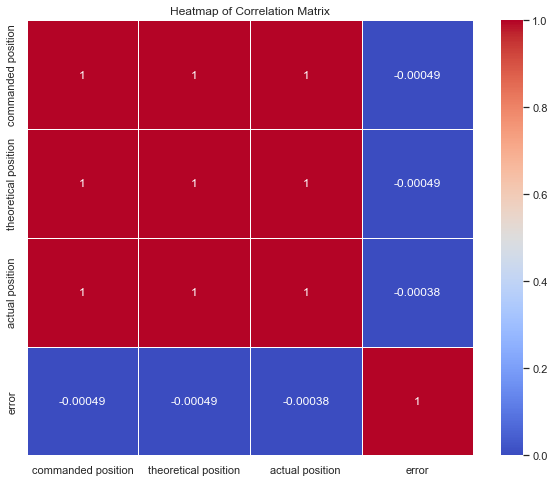

In [9]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data_b.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [10]:
# Normalize the data
scaler_X_b = MinMaxScaler()
scaler_Y_b = MinMaxScaler()
X_b = scaler_X_b.fit_transform(X_b)
Y_b = scaler_Y_b.fit_transform(Y_b.reshape(-1, 1))

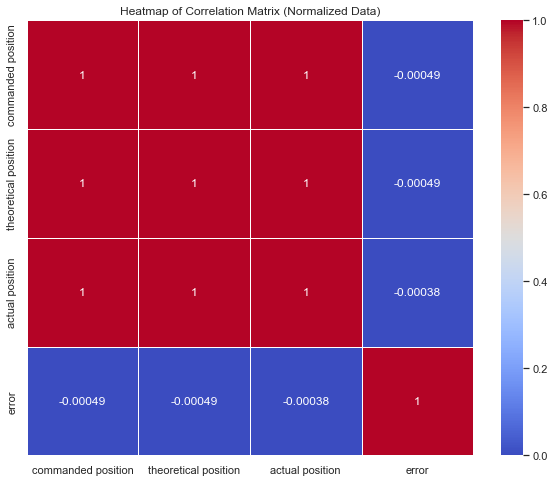

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features (Note that we are not normalizing the target variable 'error')
data_b_normalized = pd.DataFrame(scaler.fit_transform(data_b.iloc[:, :-1]), columns=data_b.columns[:-1])

# Add the target variable 'error' back into the DataFrame
data_b_normalized['error'] = data_b['error'].values

# Now let's visualize the normalized data with a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix_normalized = data_b_normalized.corr()
sns.heatmap(correlation_matrix_normalized, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix (Normalized Data)')
plt.show()


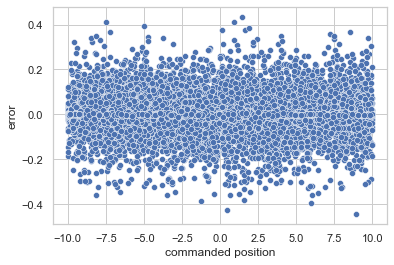

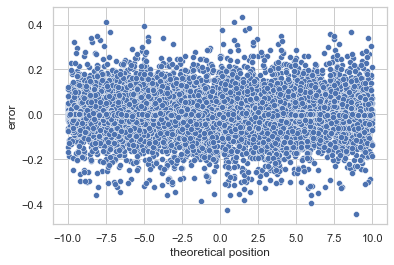

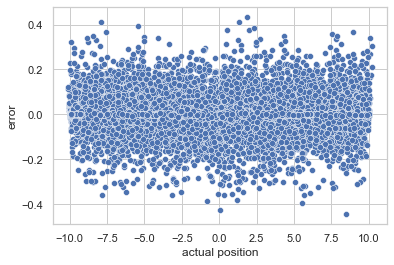

In [12]:
# Seaborn styles for the plots
sns.set_theme(style="whitegrid")

# Scatter plot for each feature against the target variable "error"
# Feature: "commanded position" vs "error"
sns.scatterplot(x=data_l['commanded position'], y=data_l['error'])
plt.show()

# Feature: "theoretical position" vs "error"
sns.scatterplot(x=data_l['theoretical position'], y=data_l['error'])
plt.show()

# Feature: "actual position" vs "error"
sns.scatterplot(x=data_l['actual position'], y=data_l['error'])
plt.show()


In [13]:
# Split data into training and testing sets
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(X_b, Y_b, test_size=0.2, random_state=42)

In [14]:
# Define the neural network
model = Sequential()
model.add(Dense(8, input_dim=X_b.shape[1], activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='tanh'))  # Assuming it's a regression task with one output

In [15]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [11]:
# Train the model
model.fit(X_train_b, Y_train_b, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
375/375 [==============================] - 3s 3ms/step - loss: 0.0023
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 9.6293e-04
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 6.8032e-04
Epoch 8/100
375/375 [==============================] - 1s 4ms/step - loss: 4.4646e-04
Epoch 9/100
375/375 [==============================] - 1s 3ms/step - loss: 2.5492e-04
Epoch 10/100
375/375 [==============================] - 1s 3ms/step - loss: 1.5111e-04
Epoch 11/100
375/375 [==============================] - 1s 3ms/step - loss: 1.0314e-04
Epoch 12/100
375/375 [==============================] - 1s 3ms/step - lo

In [16]:
# Evaluate the model
MSE_train_b = np.mean(np.square(model.predict(X_train_b) - Y_train_b))
MSE_test_b = np.mean(np.square(model.predict(X_test_b) - Y_test_b))
print('MSE on training data:', MSE_train_b)
print('MSE on testing data:', MSE_test_b)

94/94 [==============================] - 0s 3ms/step
MSE on training data: 0.9999567537061794
MSE on testing data: 1.0075048409587986


In [17]:
data_l

,commanded position,theoretical position,actual position,error
0,-4.98525,-4.99,-4.99168,0.00643
1,9.44492,9.44,9.54736,0.10244
2,0.58959,0.59,0.61596,0.02637
3,6.87078,6.87,6.79086,-0.07992
4,8.00819,8.01,8.01000,0.00181
...,...,...,...,...
14995,-1.91998,-1.92,-1.92000,0.00002
14996,8.22480,8.22,8.22000,-0.00480
14997,-8.33441,-8.33,-8.33875,0.00434
14998,-5.81230,-5.81,-5.80690,-0.00540


In [18]:
# Extract the features (X) and target (Y)
X_l = data_l.iloc[:, :-1].values
Y_l = data_l.iloc[:, -1].values

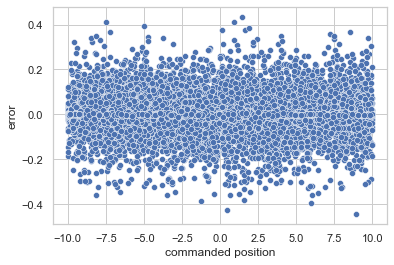

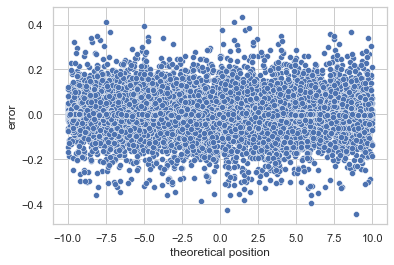

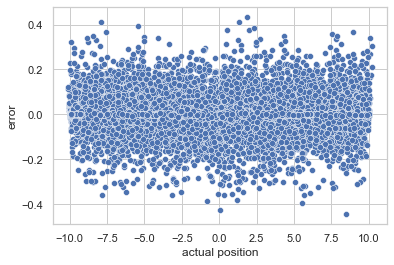

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn styles for the plots
sns.set_theme(style="whitegrid")

# Scatter plot for each feature against the target variable "error"
# Feature: "commanded position" vs "error"
sns.scatterplot(x=data_l['commanded position'], y=data_l['error'])
plt.show()

# Feature: "theoretical position" vs "error"
sns.scatterplot(x=data_l['theoretical position'], y=data_l['error'])
plt.show()

# Feature: "actual position" vs "error"
sns.scatterplot(x=data_l['actual position'], y=data_l['error'])
plt.show()


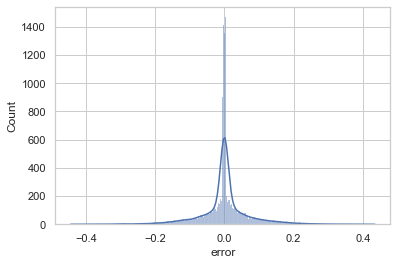

In [20]:
#Histogram
sns.histplot(data_l['error'], kde=True)
plt.show()

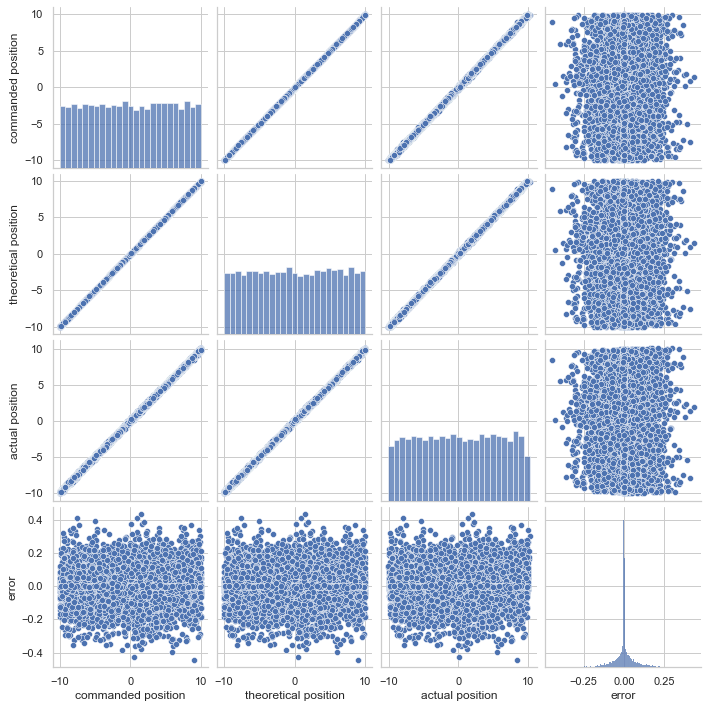

In [22]:
# Seaborn Pair Plot
sns.pairplot(data_l)
plt.show()

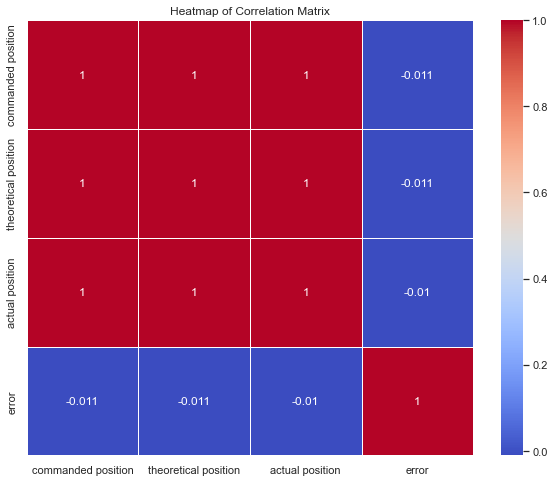

In [23]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data_l.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [24]:
# Normalize the data
scaler_X_l = MinMaxScaler()
scaler_Y_l = MinMaxScaler()
X_l = scaler_X_l.fit_transform(X_l)
Y_L = scaler_Y_l.fit_transform(Y_l.reshape(-1, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features (Note that we are not normalizing the target variable 'error')
data_b_normalized = pd.DataFrame(scaler.fit_transform(data_b.iloc[:, :-1]), columns=data_b.columns[:-1])

# Add the target variable 'error' back into the DataFrame
data_b_normalized['error'] = data_b['error'].values

# Now let's visualize the normalized data with a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix_normalized = data_b_normalized.corr()
sns.heatmap(correlation_matrix_normalized, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix (Normalized Data)')
plt.show()


In [ ]:
# Scatter Plot for each feature against the target on normalized data
for feature in features:
    sns.scatterplot(data=data_b_normalized, x=feature, y=target)
    plt.title(f'Scatter Plot of {feature} vs {target} (Normalized Data)')
    plt.show()

# Pair Plot on normalized data
sns.pairplot(data_b_normalized)
plt.show()

In [27]:
# Split data into training and testing sets
X_train_l, X_test_l, Y_train_l, Y_test_l = train_test_split(X_l, Y_l, test_size=0.2, random_state=42)

In [28]:
# Define the neural network
model = Sequential()
model.add(Dense(8, input_dim=X_l.shape[1], activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='tanh'))  # Assuming it's a regression task with one output

In [29]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [30]:
# Train the model
model.fit(X_train_l, Y_train_l, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
375/375 [==============================] - 3s 3ms/step - loss: 0.0154
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0054
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0054
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0053
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0053
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0054
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0054
Epoch 8/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0054
Epoch 9/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0053
Epoch 10/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0054
Epoch 11/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0053
Epoch 12/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0053
Epoch 13/100


375/375 [==============================] - 1s 3ms/step - loss: 0.0053
Epoch 100/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0053


In [31]:
# Evaluate the model
MSE_train_l = np.mean(np.square(model.predict(X_train_l) - Y_train_l))
MSE_test_l = np.mean(np.square(model.predict(X_test_l) - Y_test_l))
print('MSE on training data:', MSE_train_l)
print('MSE on testing data:', MSE_test_l)

94/94 [==============================] - 1s 3ms/step
MSE on training data: 0.005262400957887401
MSE on testing data: 0.005268072365823339
